# Exercise 1: eigenvalue problem

Take matrix $A = \begin{pmatrix}
0.3 & 0.6 & 0.1\\
0.5 & 0.2 & 0.3\\
0.4 & 0.1 & 0.5
\end{pmatrix}$
and vector $v = \begin{pmatrix}1/3 & 1/3 & 1/3\end{pmatrix}$. You can also initialize $v$ to be random positive numbers, just need to sum to 1. You could even think of it as a probability distribution. And do this loop:

```sudocode
do 25 times:
  v' = vA
  v = v'
```

In [1]:
import numpy as np

In [2]:
A = np.array([[0.3, 0.6, 0.1], [0.5, 0.2, 0.3], [0.4, 0.1, 0.5]])
v = np.array([1/3, 1/3, 1/3])

In [3]:
for _ in range(25):
  v_dash = v.dot(A)
  v = v_dash

By the 25th step, you've calculated original $v$ times $A^{25}$.

On each iteration, plot the Euclidean distance between $|v - v'|$ as a function of iteration.

In [4]:
from scipy.spatial import distance

dist = np.zeros(25)
for i in range(25):
  v_dash = v.dot(A)
  dist[i] = distance.euclidean(v, v_dash)
  v = v_dash

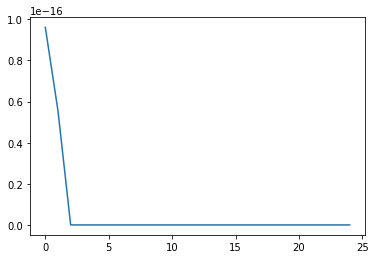

In [5]:
import matplotlib.pyplot as plt

plt.plot(dist);

What you should notice is that the distance will converge to zero.

What does it means that $v' = vA$ but distance $|v' - v| = 0$? Well, this is just another way of stating the eigenvalue problem. And what we've done here is we found the eigenvector for $A$, for which the corresponding eigenvalue is 1.

# Exercise 2: central limit theorem

Goal of this exercise is to demonstrate the central limit theorem. Recall that the central limit theorem is that if we set a random variable to be the sum of some other random variables from any distribution, then as the number of random variables in the sum approaches infinity, the distribution of the sum approaches the normal distribution. So the exercise is to demonstrate that numerically and graphically.



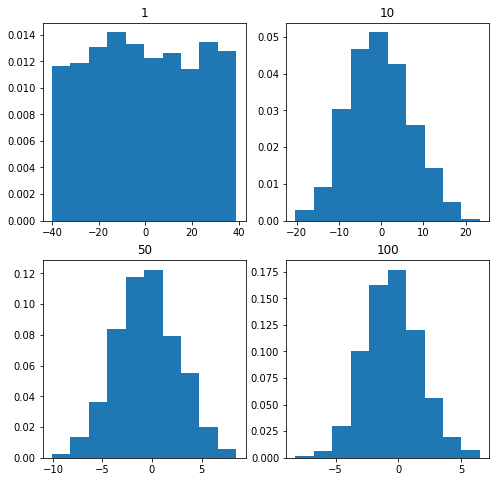

In [8]:
# number of sample
num = [1, 10, 50, 100] 
# list of sample sums
sums = [] 
 
# Generating 1, 10, 30, 100 random numbers from -40 to 40
# taking their sum and appending it to list sums.
for j in num:
    # Generating seed so that we can get same result
    # every time the loop is run...
    np.random.seed(1)
    x = [np.mean(
        np.random.randint(
            -40, 40, j)) for _i in range(1000)]
    sums.append(x)
k = 0
 
# plotting all the sums in one figure
fig, ax = plt.subplots(2, 2, figsize =(8, 8))
for i in range(0, 2):
    for j in range(0, 2):
        # Histogram for each x stored in sums
        ax[i, j].hist(sums[k], 10, density = True)
        ax[i, j].set_title(label = num[k])
        k = k + 1
plt.show()

# Exercise 3: mean image

Load in the MNIST dataset and plot the mean (average) image for each digit class 0-9. Remember that the mean is just the sum of all the images divided by the number of images.

In [9]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

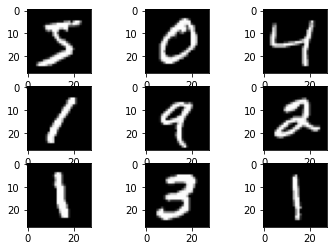

In [17]:
for i in range(9):  
  plt.subplot(3, 3, i + 1)
  plt.imshow(train_X[i], cmap='gray')
plt.show()

In [11]:
train_y[:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

In [12]:
X = np.concatenate([train_X, test_X])
Y = np.concatenate([train_y, test_y])

<function matplotlib.pyplot.show>

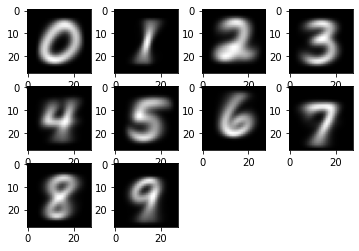

In [16]:
for digit in range(10):
  index = Y == digit
  images = X[index]
  mean_img = images.mean(axis=0)
  plt.subplot(3, 4, digit + 1)
  plt.imshow(mean_img, cmap='gray')
plt.show;

# Exercise 4: rotation

Write a function that flips an image 90 degrees clockwise. Do it in two ways:
- using loops: copy one pixel at a time
- using numpy

Then compare the performance of both methods.



In [43]:
def loop_rotate(img):
  new_img = np.zeros(img.shape)

  rows, columns = img.shape
  assert rows == columns

  for row_index in range(rows):
    for column_index in range(columns):
      new_img[column_index][columns - row_index - 1] = img[row_index][column_index]

  return new_img

In [33]:
new_img = loop_rotate(X[0])

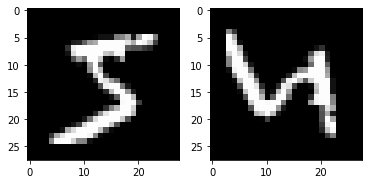

In [37]:
plt.subplot(1, 2, 1)
plt.imshow(X[0], cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(new_img, cmap='gray')

In [39]:
def numpy_rotate(img):
  return np.rot90(img, k=3)

In [41]:
new_img = numpy_rotate(X[0])

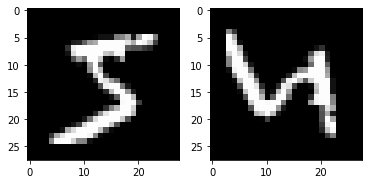

In [42]:
plt.subplot(1, 2, 1)
plt.imshow(X[0], cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(new_img, cmap='gray')

In [44]:
from datetime import datetime

def compare_rotation(images):

  t0 = datetime.now()
  for img in images:
    loop_rotate(img)
  dt1 = datetime.now() - t0

  t0 = datetime.now()
  for img in images:
    numpy_rotate(img)
  dt2 = datetime.now() - t0

  return dt1.total_seconds(), dt2.total_seconds()

In [47]:
loop_time, numpy_time = compare_rotation(X)
loop_time / numpy_time

49.497098587963464

# Exercise 5: symmetric matrix

Write a function that tests whether or not a matrix is symmetric. Do it in two ways:
- using loops and definition of symmetric matrix
- using numpy

## Loop solution

In [59]:
def is_symmetric(matrix):
  rows, columns = matrix.shape
  if rows != columns:
    return False

  for row_index in range(rows):
    for column_index in range(columns):
      if matrix[column_index][row_index] != matrix[row_index][column_index]:
        return False
  
  return True

In [61]:
matrix = np.array([[1, 0], [0, 1]])
is_symmetric(matrix)

True

In [62]:
matrix = np.array([[1, 1], [0, 1]])
is_symmetric(matrix)

False

In [63]:
matrix = np.array([[1, 0], [0, 1], [1, 1]])
is_symmetric(matrix)

False

## NumPy solution

In [67]:
matrix = np.array([[1, 0], [0, 1]])
np.all(matrix.T == matrix)

True

In [68]:
matrix = np.array([[1, 1], [0, 1]])
np.all(matrix.T == matrix)

False

In [69]:
matrix = np.array([[1, 0], [0, 1], [1, 1]])
np.all(matrix.T == matrix)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


False

# Exercise 6: XOR dataset

Generate and plot XOR dataset.

In [85]:
X = np.random.uniform(-1, 1, (1000, 2))

In [86]:
Y = np.logical_or(
    np.logical_and(X[:, 0] < 0, X[:, 1] < 0),
    np.logical_and(X[:, 0] > 0, X[:, 1] > 0)
)

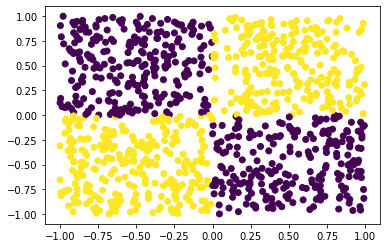

In [87]:
plt.scatter(X[:, 0], X[:, 1], c=Y)

# Exercise 7: Donught dataset

Generate and plot the doughnut (or concentric circles with some additive noise) dataset.

In [139]:
def sample_circle(COUNT, R):
  current_count = 0
  samples = np.zeros((COUNT, 2))
  while current_count < COUNT:
    sample = np.random.uniform(-1*R, R, 2)
    if sample[0]**2 + sample[1]**2 > R**2 - R and sample[0]**2 + sample[1]**2 < R**2 + R:
      samples[current_count, 0] = sample[0] 
      samples[current_count, 1] = sample[1] 
      current_count += 1

  return samples

In [146]:
X1 = sample_circle(200, 10)
X2 = sample_circle(200, 20)
X = np.concatenate((X1, X2), axis=0)
Y = np.zeros(400)
Y[:200] = 1

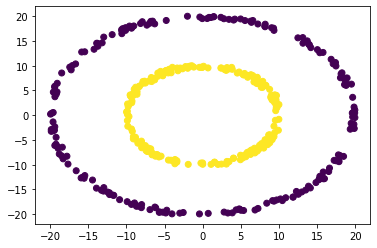

In [147]:
plt.scatter(X[:,0], X[:,1], c=Y)

# Exercise 8: Spiral dataset

Generate and plot the spiral dataset. It has arms that grow outward and both the angle and radius change simultaneously.

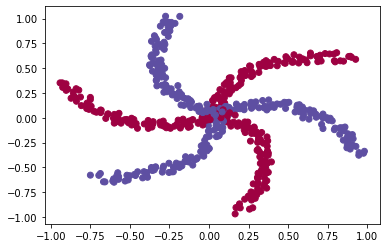

In [199]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 6 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j,(j+1),N) # theta
  X[ix] = np.c_[r*np.sin(t) + np.random.random(N)*0.1, r*np.cos(t) + np.random.random(N)*0.1]
  y[ix] = j % 2
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)